In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
sheet_names = pd.ExcelFile("Assingment_Dataset.xlsx").sheet_names
print(sheet_names)

['Geospatial Data', 'Satellite Details', 'News Reports', 'Historical Incidents']


In [9]:
satellite_details= pd.read_excel("Assingment_Dataset.xlsx", sheet_name='Satellite Details')
     

In [10]:
satellite_details.head()


,Image ID,Date,Location,Description
0,1,2024-03-01,Border Post Alpha,High-resolution image showing vehicle movement
1,2,2024-03-03,Border Post Alpha,Image showing increased military presence
2,3,2024-03-05,Border Post Alpha,Image showing an empty area
3,4,2024-03-07,Border Post Alpha,Image showing troop withdrawal
4,5,2024-03-09,Border Post Alpha,Image showing new infrastructure developments


In [11]:

satellite_details.tail(10)
     

,Image ID,Date,Location,Description
20,21,2024-04-17,Border Post Echo,High-resolution image showing vehicle movement
21,22,2024-04-19,Border Post Echo,Image showing increased military presence
22,23,2024-04-22,Border Post Echo,Image showing an empty area
23,24,2024-04-24,Border Post Echo,Image showing troop withdrawal
24,25,2024-04-27,Border Post Echo,Image showing new infrastructure developments
25,26,2024-04-29,Border Post Foxtrot,High-resolution image showing vehicle movement
26,27,2024-05-02,Border Post Foxtrot,Image showing increased military presence
27,28,2024-05-04,Border Post Foxtrot,Image showing an empty area
28,29,2024-05-07,Border Post Foxtrot,Image showing troop withdrawal
29,30,2024-05-09,Border Post Foxtrot,Image showing new infrastructure developments


In [12]:
satellite_details.size

120

In [14]:
satellite_details.info()
satellite_details['Date'] = pd.to_datetime(satellite_details['Date'], format='%d-%m-%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Image ID     30 non-null     int64         
 1   Date         30 non-null     datetime64[ns]
 2   Location     30 non-null     object        
 3   Description  30 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ KB


In [15]:
satellite_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Image ID     30 non-null     int64         
 1   Date         30 non-null     datetime64[ns]
 2   Location     30 non-null     object        
 3   Description  30 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ KB


In [16]:
satellite_details.describe()

,Image ID,Date
count,30.000000,30
mean,15.500000,2024-04-03 23:12:00
min,1.000000,2024-03-01 00:00:00
25%,8.250000,2024-03-17 12:00:00
50%,15.500000,2024-04-04 00:00:00
75%,22.750000,2024-04-21 06:00:00
max,30.000000,2024-05-09 00:00:00
std,8.803408,NaN


In [17]:
print(satellite_details.isnull().sum())
satellite_details = satellite_details.dropna()

Image ID       0
Date           0
Location       0
Description    0
dtype: int64


In [18]:

grouped_data = satellite_details.groupby('Location')
for name, group in grouped_data:
    print(f"Border Post: {name}")
    print(group)
    print("\n")

Border Post: Border Post Alpha
   Image ID       Date           Location  \
0         1 2024-03-01  Border Post Alpha   
1         2 2024-03-03  Border Post Alpha   
2         3 2024-03-05  Border Post Alpha   
3         4 2024-03-07  Border Post Alpha   
4         5 2024-03-09  Border Post Alpha   

                                      Description  
0  High-resolution image showing vehicle movement  
1       Image showing increased military presence  
2                     Image showing an empty area  
3                  Image showing troop withdrawal  
4   Image showing new infrastructure developments  


Border Post: Border Post Bravo
   Image ID       Date           Location  \
5         6 2024-03-12  Border Post Bravo   
6         7 2024-03-14  Border Post Bravo   
7         8 2024-03-17  Border Post Bravo   
8         9 2024-03-19  Border Post Bravo   
9        10 2024-03-22  Border Post Bravo   

                                      Description  
5  High-resolution image showi

In [19]:
def analyze_border_post(group):
    # Count the occurrences of each type of description
    description_counts = group['Description'].value_counts()
    return description_counts
border_post_analysis = grouped_data.apply(analyze_border_post)
print(border_post_analysis)

Description          High-resolution image showing vehicle movement  \
Location                                                              
Border Post Alpha                                                 1   
Border Post Bravo                                                 1   
Border Post Charlie                                               1   
Border Post Delta                                                 1   
Border Post Echo                                                  1   
Border Post Foxtrot                                               1   

Description          Image showing increased military presence  \
Location                                                         
Border Post Alpha                                            1   
Border Post Bravo                                            1   
Border Post Charlie                                          1   
Border Post Delta                                            1   
Border Post Echo                   

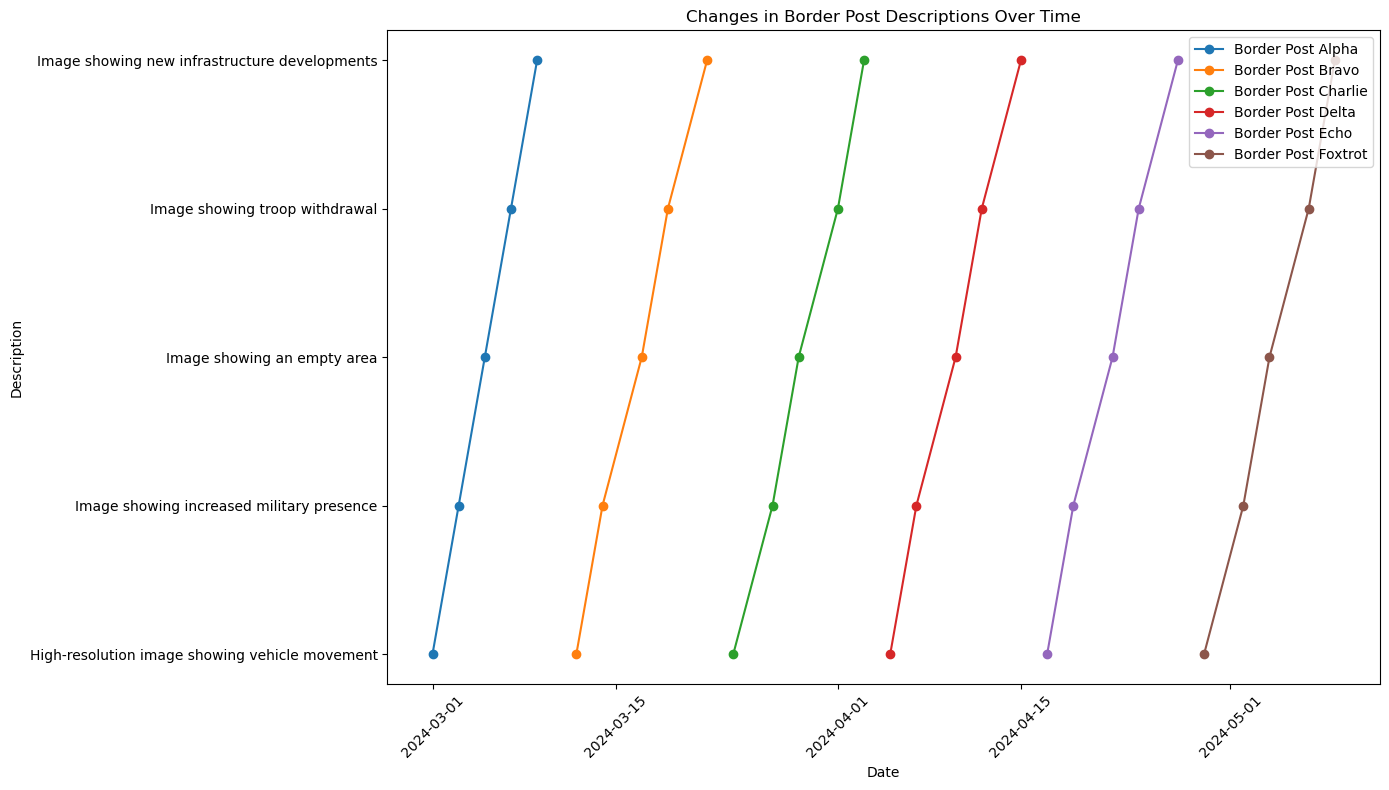

In [20]:

plt.figure(figsize=(14, 8))
for location, group in grouped_data:
    plt.plot(group['Date'], group['Description'], marker='o', label=location)
plt.xlabel('Date')
plt.ylabel('Description')
plt.title('Changes in Border Post Descriptions Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

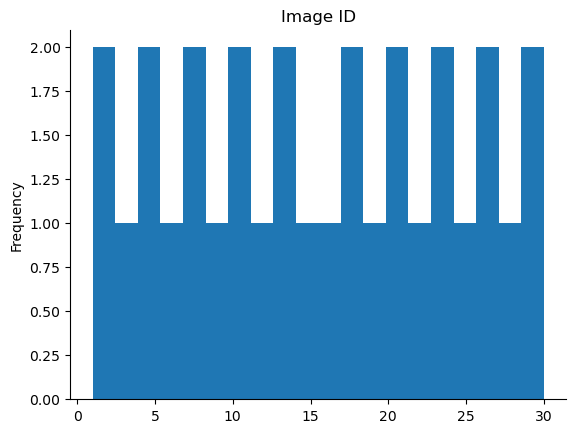

In [21]:
satellite_details['Image ID'].plot(kind='hist', bins=20, title='Image ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

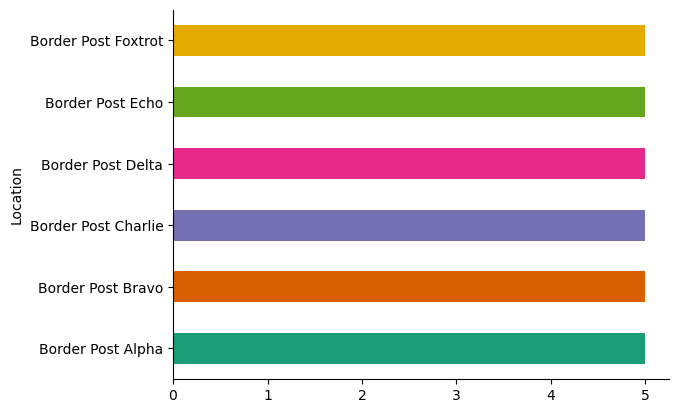

In [22]:
satellite_details.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


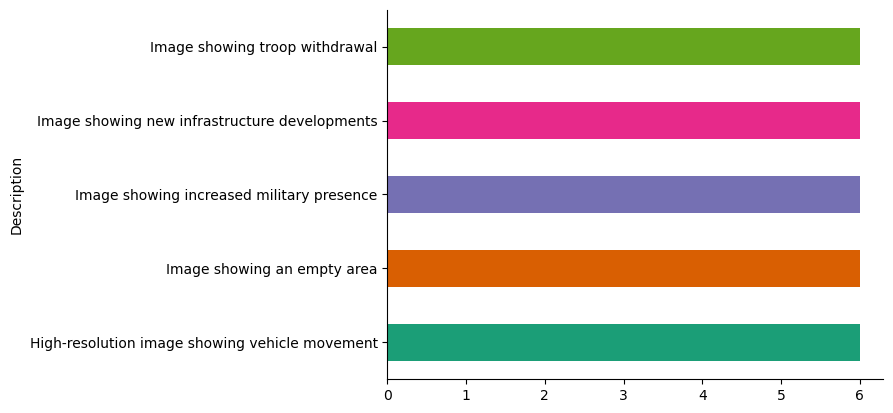

In [23]:
satellite_details.groupby('Description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
activity_counts = satellite_details['Description'].value_counts().sort_values(ascending=False)
activity_counts.plot(kind='bar', figsize=(10, 6))

NameError: name 'satellite_details' is not defined